In [1]:
pip install snscrape
pip install --upgrade emoji

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import snscrape.modules.twitter as sntwitter
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('fivethirtyeight')
from datetime import date

import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet') 

nltk.download('punkt')
#import spacy
#nlp = spacy.load("en_core_web_sm")
import spacy

# importing package to recognize stop words i.e. the, and, an etc
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = spacy.lang.en.stop_words.STOP_WORDS

import string
import re
from unidecode import unidecode

from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

stop = stopwords.words("english")
lemmatizer = WordNetLemmatizer ()
from wordcloud import ImageColorGenerator
from PIL import Image



import emoji








#hide warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\Otunba K
[nltk_data]     Ogundipe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Otunba K
[nltk_data]     Ogundipe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Otunba K
[nltk_data]     Ogundipe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
#Checking for the contents of the tweets

query = "from:PeterObi"
tweets_list = []
maxTweets = 1

for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i >= maxTweets:
        break
    tweets_list.append(vars(tweet))
    
print(tweets_list)


[{'url': 'https://twitter.com/PeterObi/status/1627717831289602067', 'date': datetime.datetime(2023, 2, 20, 17, 12, 27, tzinfo=datetime.timezone.utc), 'rawContent': 'Today, Dr. Datti and I, called on HRH Ahmed Nuhu Bamalli, the Emir Of Zazzau, in Zaria. We greatly appreciated his warmth, candour and hospitality. -PO https://t.co/fzSLJYINFW', 'renderedContent': 'Today, Dr. Datti and I, called on HRH Ahmed Nuhu Bamalli, the Emir Of Zazzau, in Zaria. We greatly appreciated his warmth, candour and hospitality. -PO https://t.co/fzSLJYINFW', 'id': 1627717831289602067, 'user': User(username='PeterObi', id=1050779471731707904, displayname='Peter Obi', rawDescription='Former Governor, Anambra State. LP Presidential Candidate, 2023. Tweets by him are signed -PO.', renderedDescription='Former Governor, Anambra State. LP Presidential Candidate, 2023. Tweets by him are signed -PO.', descriptionLinks=None, verified=True, created=datetime.datetime(2018, 10, 12, 16, 5, 23, tzinfo=datetime.timezone.utc)

In [47]:
# Create a list to append tweet data peter Obi
query = "(from:PeterObi) until:2022-03-1 since:2023-02-20 "
tweets = []
#maxTweets = 10000


# Using TwitterSearchScraper to scrape data 
#or i,tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper('from:PeterObi').get_items())):
    if i>maxTweets:
        break
#    tweets.append([tweet.date, tweet.id, tweet.username, tweet.content,tweet.hashtags, tweet.likeCount,tweet.replyCount, tweet.user.followersCount, tweet.user.friendsCount,tweet.mentionedUsers,tweet.inReplyToUser,tweet.retweetedTweet,tweet.viewCount,tweet.retweetCount, tweet.sourceLabel, tweet.url])


# Creating a dataframe from the tweets list above
tweets_df1 = pd.DataFrame(tweets, columns=['DateTime', 'TweetId', 'Username', 'Text','HashTag', "TotalLikes", "TotalReplies", "Followers", "Friends",'MentionedUsers','inReplyToUser','RetweetedTweet',"ViewCount","RetweetCount", "SourceLabel","URL"])

# Display first 5 entries from dataframe
tweets_df1.head()

# Export dataframe into a CSV
#tweets_df1.to_csv('PeterObi_tweets_v1.csv', sep=',', index=False)

0it [00:00, ?it/s]

CLEANING OBI'S Tweets

In [5]:
df = pd.read_csv('PeterObi_tweets_v1.csv', encoding = 'UTF-8')
df.head(5)

,DateTime,TweetId,Username,Text,HashTag,TotalLikes,TotalReplies,Followers,Friends,MentionedUsers,inReplyToUser,RetweetedTweet,ViewCount,RetweetCount,SourceLabel,URL
0,2023-02-21 12:40:39+00:00,1628011819263528961,PeterObi,"I've just arrived at the Eke Awka Market, Awka...",NaN,27336,919,3000481,66,NaN,NaN,NaN,542364.0,6083,Twitter for Android,https://twitter.com/PeterObi/status/1628011819...
1,2023-02-21 11:30:12+00:00,1627994089101709312,PeterObi,I just received the news of the gas explosion ...,NaN,15714,421,3000481,66,NaN,NaN,NaN,260876.0,3667,Twitter for Android,https://twitter.com/PeterObi/status/1627994089...
2,2023-02-21 11:12:42+00:00,1627989685405360128,PeterObi,I have just landed in Awka for Eke Awka Market...,NaN,20067,653,3000481,66,NaN,NaN,NaN,374827.0,5000,Twitter for Android,https://twitter.com/PeterObi/status/1627989685...
3,2023-02-20 17:12:27+00:00,1627717831289602067,PeterObi,"Today, Dr. Datti and I, called on HRH Ahmed Nu...",NaN,29966,842,3000481,66,NaN,NaN,NaN,701084.0,8253,Twitter for Android,https://twitter.com/PeterObi/status/1627717831...
4,2023-02-19 18:25:45+00:00,1627373889738141698,PeterObi,God bless you. -PO,NaN,3346,116,3000481,66,NaN,https://twitter.com/PeterObi,NaN,117242.0,503,Twitter for Android,https://twitter.com/PeterObi/status/1627373889...


In [12]:
#define a function to clean up the tweets. input - text field of all #the rows, output - cleaned text 
def CleanedTexts(text):
    # change to small letter
    text = text.lower()
    # Remove mentions
    text = re.sub(r'@[A-Za-z0-9:_]+', '', text)
    # Remove hashtags
    text = re.sub(r'#', '', text) #Remove '#' symbol
    # Remove retweets:
    text = re.sub(r'RT[\s]+', '', text)
    # Remove urls
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)
    #emoji to text description
    text = emoji.demojize(text)
    #remove amp
    text = re.sub(r'&amp;', '', text)
    # Remove strange characters and Unicode
    text = unidecode(text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    #rempve strange characters
    text = re.sub(r'ðŸ™', '', text)
    # Removepuntuation and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    #remove new lines
    text = re.sub(r'\n', ' ', text)
    # Tokenize words and remove stop words and emojis
    tokens = word_tokenize(text)
    #filtered_words = [w for w in tokens if w.lower() not in stop_words and w not in list(emoji.UNICODE_EMOJI.keys())]
    filtered_words = [w for w in tokens if w.lower() not in stop_words and w not in list(emoji.EMOJI_DATA.values())]
    # lemmetizing words
    lemmetizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text

In [13]:
df['Cleaned_Texts'] = df['Text'].apply(CleanedTexts)

In [14]:
df.head(5)

,DateTime,TweetId,Username,Text,HashTag,TotalLikes,TotalReplies,Followers,Friends,MentionedUsers,inReplyToUser,RetweetedTweet,ViewCount,RetweetCount,SourceLabel,URL,Cleaned_Texts
0,2023-02-21 12:40:39+00:00,1628011819263528961,PeterObi,"I've just arrived at the Eke Awka Market, Awka...",NaN,27336,919,3000481,66,NaN,NaN,NaN,542364.0,6083,Twitter for Android,https://twitter.com/PeterObi/status/1628011819...,ive arrived eke awka market awka market storm po
1,2023-02-21 11:30:12+00:00,1627994089101709312,PeterObi,I just received the news of the gas explosion ...,NaN,15714,421,3000481,66,NaN,NaN,NaN,260876.0,3667,Twitter for Android,https://twitter.com/PeterObi/status/1627994089...,received news gas explosion rocked effurun nea...
2,2023-02-21 11:12:42+00:00,1627989685405360128,PeterObi,I have just landed in Awka for Eke Awka Market...,NaN,20067,653,3000481,66,NaN,NaN,NaN,374827.0,5000,Twitter for Android,https://twitter.com/PeterObi/status/1627989685...,landed awka eke awka market road walk welcomed...
3,2023-02-20 17:12:27+00:00,1627717831289602067,PeterObi,"Today, Dr. Datti and I, called on HRH Ahmed Nu...",NaN,29966,842,3000481,66,NaN,NaN,NaN,701084.0,8253,Twitter for Android,https://twitter.com/PeterObi/status/1627717831...,today dr datti called hrh ahmed nuhu bamalli e...
4,2023-02-19 18:25:45+00:00,1627373889738141698,PeterObi,God bless you. -PO,NaN,3346,116,3000481,66,NaN,https://twitter.com/PeterObi,NaN,117242.0,503,Twitter for Android,https://twitter.com/PeterObi/status/1627373889...,god bless po


In [18]:

# convert the datetime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# extract the date and time into separate columns
df['date'] = df['DateTime'].dt.date
df['time'] = df['DateTime'].dt.time

# drop the original datetime column if desired
df.drop('DateTime', axis=1, inplace=True)

# display the resulting dataframe
print(df.head())


               TweetId  Username  \
0  1628011819263528961  PeterObi   
1  1627994089101709312  PeterObi   
2  1627989685405360128  PeterObi   
3  1627717831289602067  PeterObi   
4  1627373889738141698  PeterObi   

                                                Text HashTag  TotalLikes  \
0  I've just arrived at the Eke Awka Market, Awka...     NaN       27336   
1  I just received the news of the gas explosion ...     NaN       15714   
2  I have just landed in Awka for Eke Awka Market...     NaN       20067   
3  Today, Dr. Datti and I, called on HRH Ahmed Nu...     NaN       29966   
4                                 God bless you. -PO     NaN        3346   

   TotalReplies  Followers  Friends MentionedUsers  \
0           919    3000481       66            NaN   
1           421    3000481       66            NaN   
2           653    3000481       66            NaN   
3           842    3000481       66            NaN   
4           116    3000481       66            NaN   

 

In [19]:
#group counts of tweets by date
dt=df.groupby('date').size()
dt

date
2018-10-25     1
2018-10-26     1
2018-10-30     2
2018-11-08     1
2018-11-09     2
              ..
2023-02-16    10
2023-02-18    12
2023-02-19     3
2023-02-20     1
2023-02-21     3
Length: 431, dtype: int64

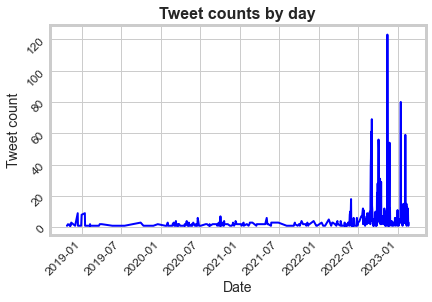

In [25]:
#plot linechat of tweets by day
#sns.lineplot(err_style="band",data = dt);

# plot a line chart of the tweet counts by day with customized style
sns.set_style("whitegrid")  # set the plot style
sns.set_palette("Set1")     # set the color palette

ax = sns.lineplot(data=dt, linewidth=2, color='b')  # set line width and color

# set the plot title and axis labels
ax.set_title('Tweet counts by day', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Tweet count', fontsize=14)

# set the tick label size and rotation
ax.tick_params(labelsize=12, rotation=45)

# adjust the x-axis label spacing
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.15)

# display the plot
plt.show()

In [27]:
# Function for polarity score
def polarity(Tweets):
    return TextBlob(Tweets).sentiment.polarity

def subjectivity(Tweets):
    return TextBlob(Tweets).sentiment.subjectivity

# Function to get sentiment type
#setting the conditions
def segmentation(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [29]:
# using the functions to get the polarity and sentiment
df['Polarity'] = df['Cleaned_Texts'].apply(polarity)
df['Subjectivity'] = df['Cleaned_Texts'].apply(subjectivity)
df['Sentiment'] = df['Polarity'].apply(segmentation)
sent = df['Sentiment'].value_counts()
sent

Positive    1193
Neutral      690
Negative     342
Name: Sentiment, dtype: int64

In [30]:
df.head()

,TweetId,Username,Text,HashTag,TotalLikes,TotalReplies,Followers,Friends,MentionedUsers,inReplyToUser,...,ViewCount,RetweetCount,SourceLabel,URL,Cleaned_Texts,date,time,Polarity,Subjectivity,Sentiment
0,1628011819263528961,PeterObi,"I've just arrived at the Eke Awka Market, Awka...",NaN,27336,919,3000481,66,NaN,NaN,...,542364.0,6083,Twitter for Android,https://twitter.com/PeterObi/status/1628011819...,ive arrived eke awka market awka market storm po,2023-02-21,12:40:39,0.0,0.00,Neutral
1,1627994089101709312,PeterObi,I just received the news of the gas explosion ...,NaN,15714,421,3000481,66,NaN,NaN,...,260876.0,3667,Twitter for Android,https://twitter.com/PeterObi/status/1627994089...,received news gas explosion rocked effurun nea...,2023-02-21,11:30:12,0.4,0.60,Positive
2,1627989685405360128,PeterObi,I have just landed in Awka for Eke Awka Market...,NaN,20067,653,3000481,66,NaN,NaN,...,374827.0,5000,Twitter for Android,https://twitter.com/PeterObi/status/1627989685...,landed awka eke awka market road walk welcomed...,2023-02-21,11:12:42,0.0,0.25,Neutral
3,1627717831289602067,PeterObi,"Today, Dr. Datti and I, called on HRH Ahmed Nu...",NaN,29966,842,3000481,66,NaN,NaN,...,701084.0,8253,Twitter for Android,https://twitter.com/PeterObi/status/1627717831...,today dr datti called hrh ahmed nuhu bamalli e...,2023-02-20,17:12:27,0.2,0.10,Positive
4,1627373889738141698,PeterObi,God bless you. -PO,NaN,3346,116,3000481,66,NaN,https://twitter.com/PeterObi,...,117242.0,503,Twitter for Android,https://twitter.com/PeterObi/status/1627373889...,god bless po,2023-02-19,18:25:45,0.0,0.00,Neutral


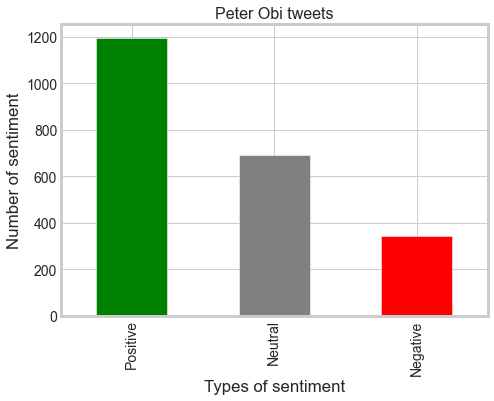

In [32]:
# plotting bar chart for the Sentiment
plt.subplot(1,2,1)
sent.plot(kind='bar', color=['green','grey','red'], figsize=(15,5))
plt.title('Peter Obi tweets', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment');

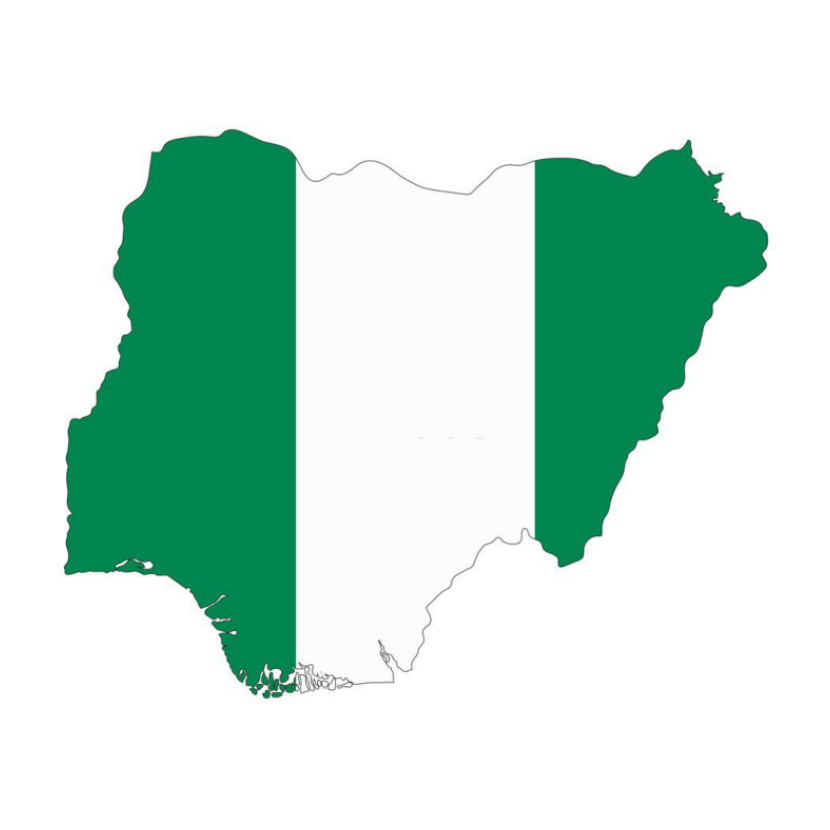

In [33]:
image = np.array(Image.open('NaijaFlag.png'))    
plt.figure(figsize=(18, 14)) 
plt.imshow(image) 
plt.axis('off')
plt.show() 

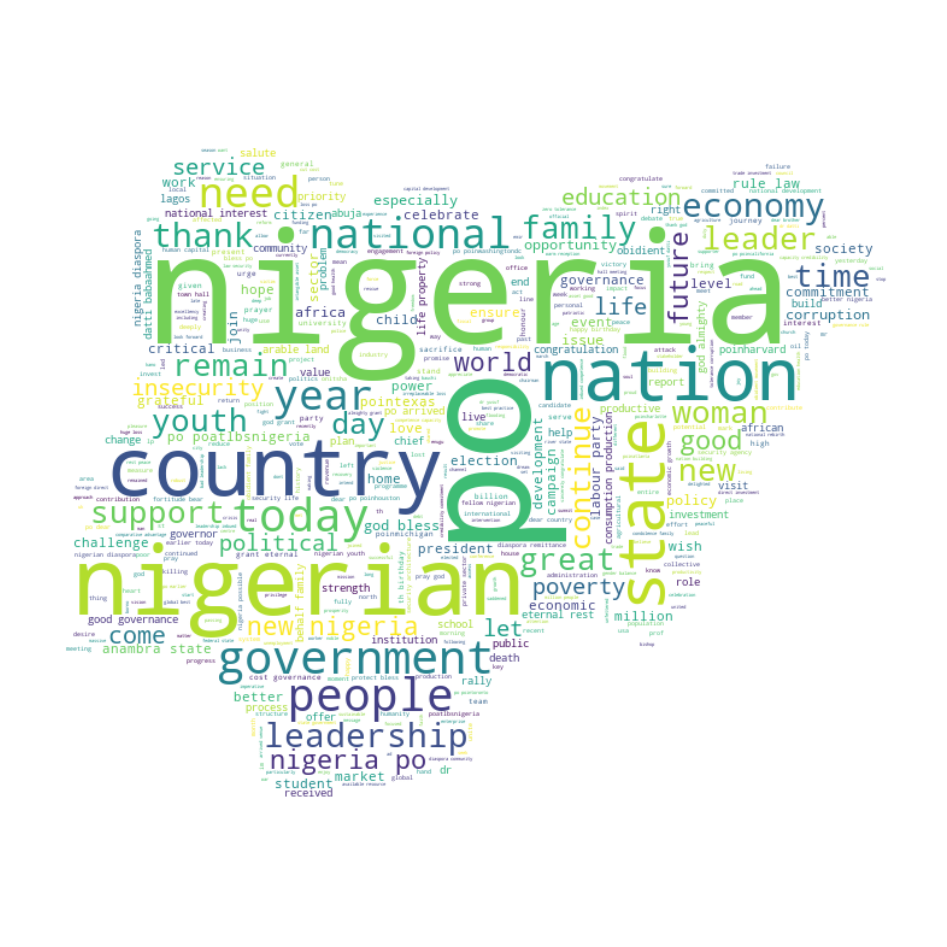

In [35]:
#Join all the tweets
full_tweet = " ".join(df["Cleaned_Texts"])

# Instantiate The Word Cloud and Set it to contain maximum of 1000 words
peterobi_wc = WordCloud(background_color='white', max_words=1000, mask=image)

# generate the word cloud
peterobi_wc.generate(full_tweet)


# display the word cloud
plt.figure(figsize=(18, 16))
plt.imshow(peterobi_wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [36]:
peterobi_wc.to_file("PeterObi_WordCloud.png")

In [38]:
df.to_csv('Peter_Obi_final_tweets.csv')
#saving the processed data

BATS SENTIMENT ANALYSIS

In [49]:
# Create a list to append tweet data BAT
query = "(from:officialABAT) until:2022-03-1 since:2023-02-20 "
tweets = []
#maxTweets = 10000


# Using TwitterSearchScraper to scrape data 
#for i,tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper('from:officialABAT').get_items())):
    if i>maxTweets:
        break
#    tweets.append([tweet.date, tweet.id, tweet.username, tweet.content,tweet.hashtags, tweet.likeCount,tweet.replyCount, tweet.user.followersCount, tweet.user.friendsCount,tweet.mentionedUsers,tweet.inReplyToUser,tweet.retweetedTweet,tweet.viewCount,tweet.retweetCount, tweet.sourceLabel, tweet.url])


# Creating a dataframe from the tweets list above
tweets_df1 = pd.DataFrame(tweets, columns=['DateTime', 'TweetId', 'Username', 'Text','HashTag', "TotalLikes", "TotalReplies", "Followers", "Friends",'MentionedUsers','inReplyToUser','RetweetedTweet',"ViewCount","RetweetCount", "SourceLabel","URL"])

# Display first 5 entries from dataframe
tweets_df1.head()

# Export dataframe into a CSV
#tweets_df1.to_csv('BolaTinubu_tweets_v1.csv', sep=',', index=False)

0it [00:00, ?it/s]

In [39]:
df = pd.read_csv('BolaTinubu_tweets_v1.csv', encoding = 'UTF-8')
df.head(5)

,DateTime,TweetId,Username,Text,HashTag,TotalLikes,TotalReplies,Followers,Friends,MentionedUsers,inReplyToUser,RetweetedTweet,ViewCount,RetweetCount,SourceLabel,URL
0,2023-02-20 09:10:20+00:00,1627596505128345605,officialABAT,#RenewedHope23 https://t.co/odG1niwkpR,['RenewedHope23'],1574,298,1680332,42,NaN,NaN,NaN,85286.0,488,Twitter for iPhone,https://twitter.com/officialABAT/status/162759...
1,2023-02-19 17:21:41+00:00,1627357767366320128,officialABAT,Thank you Borno\n#RenewedHope23 https://t.co/p...,['RenewedHope23'],3768,386,1680332,42,NaN,NaN,NaN,180047.0,953,Twitter for iPhone,https://twitter.com/officialABAT/status/162735...
2,2023-02-18 20:31:47+00:00,1627043222101917698,officialABAT,https://t.co/YyY7w4uaSi,NaN,1528,117,1680332,42,NaN,https://twitter.com/officialABAT,NaN,73759.0,360,Twitter for iPhone,https://twitter.com/officialABAT/status/162704...
3,2023-02-18 20:31:44+00:00,1627043207681908736,officialABAT,Thank you Borno \n\nI am overwhelmed by the lo...,['RenewedHope23'],7652,900,1680332,42,NaN,NaN,NaN,432036.0,1624,Twitter for iPhone,https://twitter.com/officialABAT/status/162704...
4,2023-02-18 09:57:23+00:00,1626883566889013248,officialABAT,#RenewedHope23 https://t.co/FtBBH7HcEC,['RenewedHope23'],1899,367,1680332,42,NaN,NaN,NaN,103801.0,636,Twitter for iPhone,https://twitter.com/officialABAT/status/162688...


In [40]:
df['Cleaned_Texts'] = df['Text'].apply(CleanedTexts)

In [41]:
df.head(5)

,DateTime,TweetId,Username,Text,HashTag,TotalLikes,TotalReplies,Followers,Friends,MentionedUsers,inReplyToUser,RetweetedTweet,ViewCount,RetweetCount,SourceLabel,URL,Cleaned_Texts
0,2023-02-20 09:10:20+00:00,1627596505128345605,officialABAT,#RenewedHope23 https://t.co/odG1niwkpR,['RenewedHope23'],1574,298,1680332,42,NaN,NaN,NaN,85286.0,488,Twitter for iPhone,https://twitter.com/officialABAT/status/162759...,renewedhope
1,2023-02-19 17:21:41+00:00,1627357767366320128,officialABAT,Thank you Borno\n#RenewedHope23 https://t.co/p...,['RenewedHope23'],3768,386,1680332,42,NaN,NaN,NaN,180047.0,953,Twitter for iPhone,https://twitter.com/officialABAT/status/162735...,thank borno renewedhope
2,2023-02-18 20:31:47+00:00,1627043222101917698,officialABAT,https://t.co/YyY7w4uaSi,NaN,1528,117,1680332,42,NaN,https://twitter.com/officialABAT,NaN,73759.0,360,Twitter for iPhone,https://twitter.com/officialABAT/status/162704...,
3,2023-02-18 20:31:44+00:00,1627043207681908736,officialABAT,Thank you Borno \n\nI am overwhelmed by the lo...,['RenewedHope23'],7652,900,1680332,42,NaN,NaN,NaN,432036.0,1624,Twitter for iPhone,https://twitter.com/officialABAT/status/162704...,thank borno overwhelmed love youve openly disp...
4,2023-02-18 09:57:23+00:00,1626883566889013248,officialABAT,#RenewedHope23 https://t.co/FtBBH7HcEC,['RenewedHope23'],1899,367,1680332,42,NaN,NaN,NaN,103801.0,636,Twitter for iPhone,https://twitter.com/officialABAT/status/162688...,renewedhope


In [42]:
# convert the datetime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# extract the date and time into separate columns
df['date'] = df['DateTime'].dt.date
df['time'] = df['DateTime'].dt.time

# drop the original datetime column if desired
df.drop('DateTime', axis=1, inplace=True)

# display the resulting dataframe
print(df.head())

               TweetId      Username  \
0  1627596505128345605  officialABAT   
1  1627357767366320128  officialABAT   
2  1627043222101917698  officialABAT   
3  1627043207681908736  officialABAT   
4  1626883566889013248  officialABAT   

                                                Text            HashTag  \
0             #RenewedHope23 https://t.co/odG1niwkpR  ['RenewedHope23']   
1  Thank you Borno\n#RenewedHope23 https://t.co/p...  ['RenewedHope23']   
2                            https://t.co/YyY7w4uaSi                NaN   
3  Thank you Borno \n\nI am overwhelmed by the lo...  ['RenewedHope23']   
4             #RenewedHope23 https://t.co/FtBBH7HcEC  ['RenewedHope23']   

   TotalLikes  TotalReplies  Followers  Friends MentionedUsers  \
0        1574           298    1680332       42            NaN   
1        3768           386    1680332       42            NaN   
2        1528           117    1680332       42            NaN   
3        7652           900    1680332      

In [43]:
#group counts of tweets by date
dt=df.groupby('date').size()
dt

date
2012-02-15    1
2013-11-16    3
2013-11-19    1
2013-11-26    2
2013-11-29    4
             ..
2023-02-16    5
2023-02-17    5
2023-02-18    3
2023-02-19    1
2023-02-20    1
Length: 474, dtype: int64

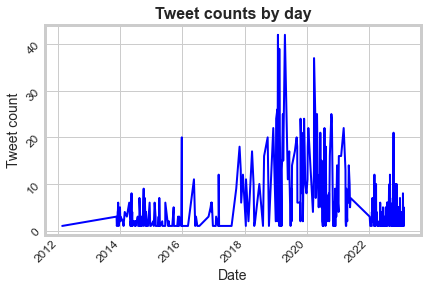

In [44]:
#plot linechat of tweets by day
#sns.lineplot(err_style="band",data = dt);

# plot a line chart of the tweet counts by day with customized style
sns.set_style("whitegrid")  # set the plot style
sns.set_palette("Set1")     # set the color palette

ax = sns.lineplot(data=dt, linewidth=2, color='b')  # set line width and color

# set the plot title and axis labels
ax.set_title('Tweet counts by day', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Tweet count', fontsize=14)

# set the tick label size and rotation
ax.tick_params(labelsize=12, rotation=45)

# adjust the x-axis label spacing
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.15)

# display the plot
plt.show()

In [47]:
# Function for polarity score
def polarity(Tweets):
    return TextBlob(Tweets).sentiment.polarity

def subjectivity(Tweets):
    return TextBlob(Tweets).sentiment.subjectivity

# Function to get sentiment type
#setting the conditions
def segmentation(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [48]:
# using the functions to get the polarity and sentiment
df['Polarity'] = df['Cleaned_Texts'].apply(polarity)
df['Subjectivity'] = df['Cleaned_Texts'].apply(subjectivity)
df['Sentiment'] = df['Polarity'].apply(segmentation)
sent = df['Sentiment'].value_counts()
sent

Positive    1240
Neutral      740
Negative     356
Name: Sentiment, dtype: int64

In [49]:
df.head()

,TweetId,Username,Text,HashTag,TotalLikes,TotalReplies,Followers,Friends,MentionedUsers,inReplyToUser,...,ViewCount,RetweetCount,SourceLabel,URL,Cleaned_Texts,date,time,Polarity,Subjectivity,Sentiment
0,1627596505128345605,officialABAT,#RenewedHope23 https://t.co/odG1niwkpR,['RenewedHope23'],1574,298,1680332,42,NaN,NaN,...,85286.0,488,Twitter for iPhone,https://twitter.com/officialABAT/status/162759...,renewedhope,2023-02-20,09:10:20,0.00,0.00,Neutral
1,1627357767366320128,officialABAT,Thank you Borno\n#RenewedHope23 https://t.co/p...,['RenewedHope23'],3768,386,1680332,42,NaN,NaN,...,180047.0,953,Twitter for iPhone,https://twitter.com/officialABAT/status/162735...,thank borno renewedhope,2023-02-19,17:21:41,0.00,0.00,Neutral
2,1627043222101917698,officialABAT,https://t.co/YyY7w4uaSi,NaN,1528,117,1680332,42,NaN,https://twitter.com/officialABAT,...,73759.0,360,Twitter for iPhone,https://twitter.com/officialABAT/status/162704...,,2023-02-18,20:31:47,0.00,0.00,Neutral
3,1627043207681908736,officialABAT,Thank you Borno \n\nI am overwhelmed by the lo...,['RenewedHope23'],7652,900,1680332,42,NaN,NaN,...,432036.0,1624,Twitter for iPhone,https://twitter.com/officialABAT/status/162704...,thank borno overwhelmed love youve openly disp...,2023-02-18,20:31:44,0.25,0.55,Positive
4,1626883566889013248,officialABAT,#RenewedHope23 https://t.co/FtBBH7HcEC,['RenewedHope23'],1899,367,1680332,42,NaN,NaN,...,103801.0,636,Twitter for iPhone,https://twitter.com/officialABAT/status/162688...,renewedhope,2023-02-18,09:57:23,0.00,0.00,Neutral


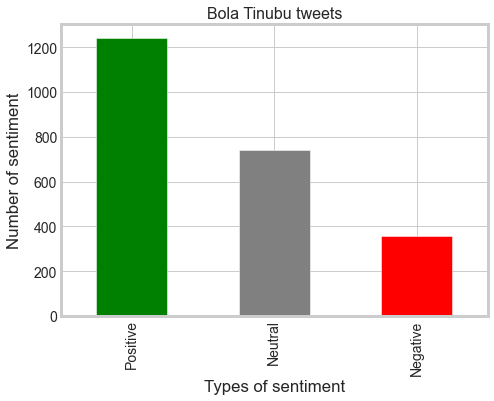

In [50]:
# plotting bar chart for the Sentiment
plt.subplot(1,2,1)
sent.plot(kind='bar', color=['green','grey','red'], figsize=(15,5))
plt.title('Bola Tinubu tweets', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment');

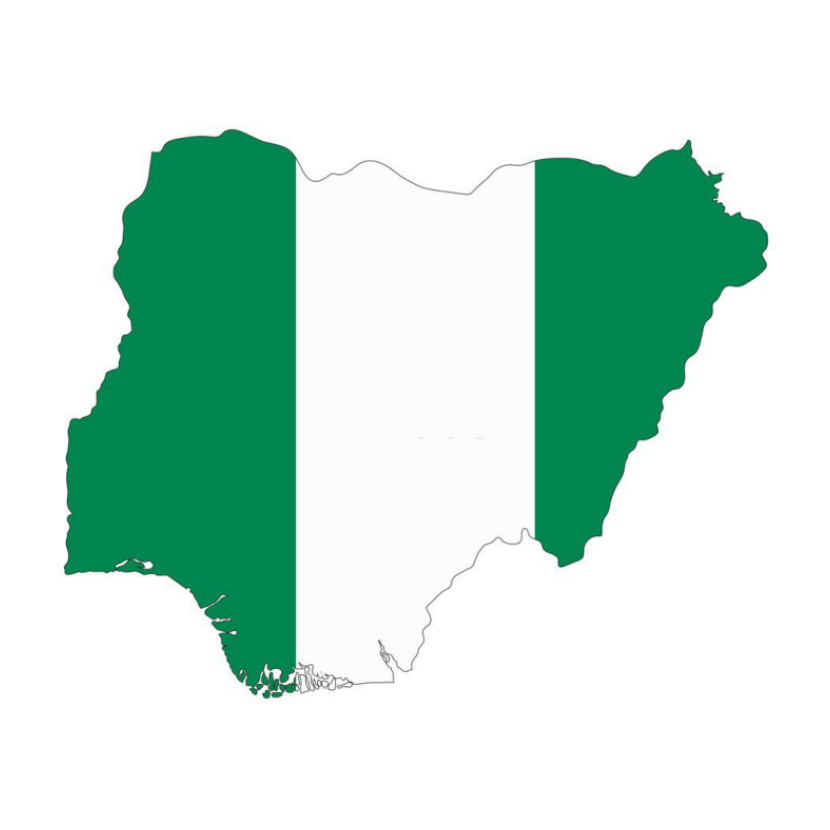

In [51]:
image = np.array(Image.open('NaijaFlag.png'))    
plt.figure(figsize=(18, 14)) 
plt.imshow(image) 
plt.axis('off')
plt.show() 

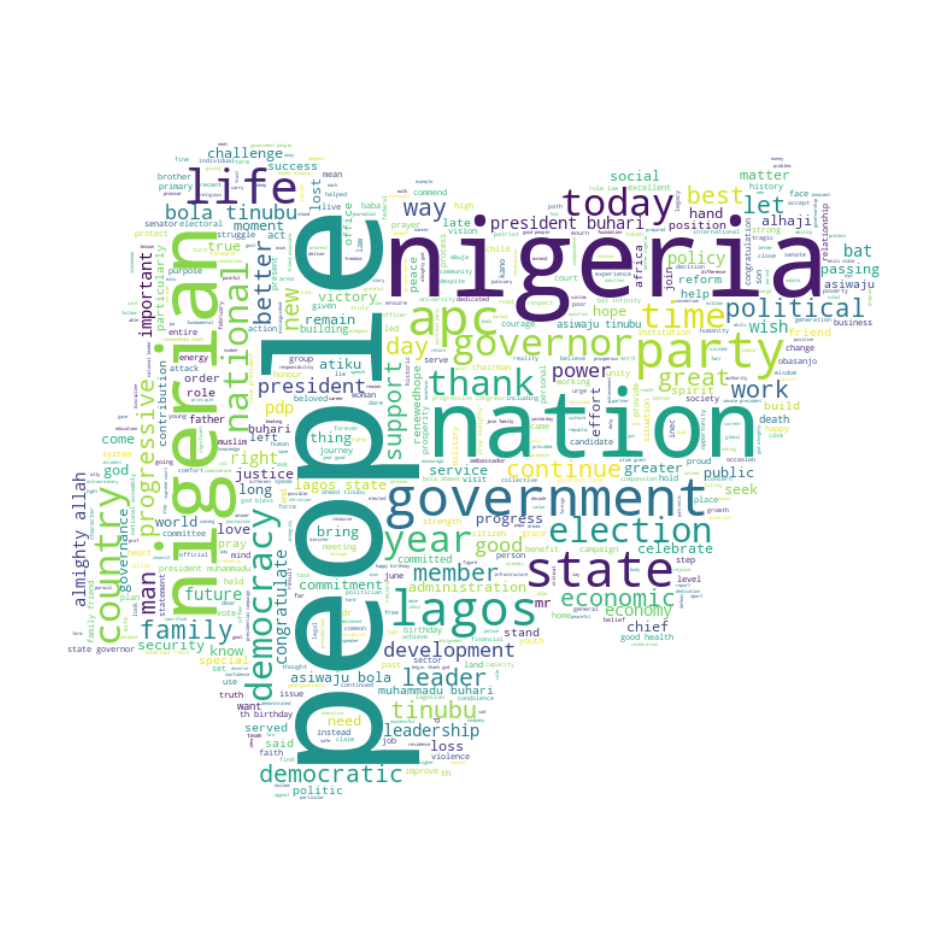

In [53]:
#Join all the tweets
full_tweet = " ".join(df["Cleaned_Texts"])

# Instantiate The Word Cloud and Set it to contain maximum of 1000 words
bolatinubu_wc = WordCloud(background_color='white', max_words=1000, mask=image)

# generate the word cloud
bolatinubu_wc.generate(full_tweet)


# display the word cloud
plt.figure(figsize=(18, 16))
plt.imshow(bolatinubu_wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [54]:
bolatinubu_wc.to_file("BolaTinubu_WordCloud.png")

In [55]:
df.to_csv('Bola_Tinubu_final_tweets.csv')
#saving the processed data

ATIKU SENTIMENT ANALYSIS

In [51]:
# Create a list to append tweet data
query = "(from:atiku) until:2022-03-1 since:2023-02-20 "
tweets = []
maxTweets = 2500


# Using TwitterSearchScraper to scrape data 
#for i,tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper('from:atiku').get_items())):
    if i>maxTweets:
        break
#    tweets.append([tweet.date, tweet.id, tweet.username, tweet.content,tweet.hashtags, tweet.likeCount,tweet.replyCount, tweet.user.followersCount, tweet.user.friendsCount,tweet.mentionedUsers,tweet.inReplyToUser,tweet.retweetedTweet,tweet.viewCount,tweet.retweetCount, tweet.sourceLabel, tweet.url])


# Creating a dataframe from the tweets list above
tweets_df1 = pd.DataFrame(tweets, columns=['DateTime', 'TweetId', 'Username', 'Text','HashTag', "TotalLikes", "TotalReplies", "Followers", "Friends",'MentionedUsers','inReplyToUser','RetweetedTweet',"ViewCount","RetweetCount", "SourceLabel","URL"])

# Display first 5 entries from dataframe
tweets_df1.head()

# Export dataframe into a CSV
#tweets_df1.to_csv('Atiku_tweets_v1.csv', sep=',', index=False)

0it [00:00, ?it/s]

In [52]:
tweets_df1.head()

,DateTime,TweetId,Username,Text,HashTag,TotalLikes,TotalReplies,Followers,Friends,MentionedUsers,inReplyToUser,RetweetedTweet,ViewCount,RetweetCount,SourceLabel,URL
0,2023-02-21 17:31:56+00:00,1628085124435783690,atiku,"Earlier today, I was pleased to receive a dele...",None,793,309,4819950,161,"[https://twitter.com/UNDP, https://twitter.com...",None,None,29714.0,200,Twitter for iPhone,https://twitter.com/atiku/status/1628085124435...
1,2023-02-20 17:49:33+00:00,1627727167948787734,atiku,I just finished a meeting with the Commonwealt...,None,3285,1399,4819950,161,None,None,None,161893.0,557,Twitter for iPhone,https://twitter.com/atiku/status/1627727167948...
2,2023-02-20 08:09:07+00:00,1627581098250084353,atiku,"Last night, I met with Rivers State Stakeholde...",None,4862,1151,4819950,161,None,None,None,415474.0,837,Twitter for iPhone,https://twitter.com/atiku/status/1627581098250...
3,2023-02-19 11:36:48+00:00,1627270976302972930,atiku,"On behalf of my team, I wholeheartedly thank e...",[RecoverNigeria],342,20,4819950,161,None,https://twitter.com/atiku,None,24122.0,96,Twitter for iPhone,https://twitter.com/atiku/status/1627270976302...
4,2023-02-19 11:36:47+00:00,1627270972699996161,atiku,I believe that when we all play our parts as s...,None,336,26,4819950,161,[https://twitter.com/OfficialPDPNig],https://twitter.com/atiku,None,26451.0,101,Twitter for iPhone,https://twitter.com/atiku/status/1627270972699...


In [56]:
df = pd.read_csv('Atiku_tweets_v1.csv', encoding = 'UTF-8')
df.head(5)

,DateTime,TweetId,Username,Text,HashTag,TotalLikes,TotalReplies,Followers,Friends,MentionedUsers,inReplyToUser,RetweetedTweet,ViewCount,RetweetCount,SourceLabel,URL
0,2023-02-21 17:31:56+00:00,1628085124435783690,atiku,"Earlier today, I was pleased to receive a dele...",NaN,793,309,4819950,161,"[User(username='UNDP', id=20596281, displaynam...",NaN,NaN,29714.0,200,Twitter for iPhone,https://twitter.com/atiku/status/1628085124435...
1,2023-02-20 17:49:33+00:00,1627727167948787734,atiku,I just finished a meeting with the Commonwealt...,NaN,3285,1399,4819950,161,NaN,NaN,NaN,161893.0,557,Twitter for iPhone,https://twitter.com/atiku/status/1627727167948...
2,2023-02-20 08:09:07+00:00,1627581098250084353,atiku,"Last night, I met with Rivers State Stakeholde...",NaN,4862,1151,4819950,161,NaN,NaN,NaN,415474.0,837,Twitter for iPhone,https://twitter.com/atiku/status/1627581098250...
3,2023-02-19 11:36:48+00:00,1627270976302972930,atiku,"On behalf of my team, I wholeheartedly thank e...",['RecoverNigeria'],342,20,4819950,161,NaN,https://twitter.com/atiku,NaN,24122.0,96,Twitter for iPhone,https://twitter.com/atiku/status/1627270976302...
4,2023-02-19 11:36:47+00:00,1627270972699996161,atiku,I believe that when we all play our parts as s...,NaN,336,26,4819950,161,"[User(username='OfficialPDPNig', id=7470641311...",https://twitter.com/atiku,NaN,26451.0,101,Twitter for iPhone,https://twitter.com/atiku/status/1627270972699...


In [57]:
df['Cleaned_Texts'] = df['Text'].apply(CleanedTexts)

In [58]:
df.head(5)

,DateTime,TweetId,Username,Text,HashTag,TotalLikes,TotalReplies,Followers,Friends,MentionedUsers,inReplyToUser,RetweetedTweet,ViewCount,RetweetCount,SourceLabel,URL,Cleaned_Texts
0,2023-02-21 17:31:56+00:00,1628085124435783690,atiku,"Earlier today, I was pleased to receive a dele...",NaN,793,309,4819950,161,"[User(username='UNDP', id=20596281, displaynam...",NaN,NaN,29714.0,200,Twitter for iPhone,https://twitter.com/atiku/status/1628085124435...,earlier today pleased receive delegation led a...
1,2023-02-20 17:49:33+00:00,1627727167948787734,atiku,I just finished a meeting with the Commonwealt...,NaN,3285,1399,4819950,161,NaN,NaN,NaN,161893.0,557,Twitter for iPhone,https://twitter.com/atiku/status/1627727167948...,finished meeting commonwealth observer group n...
2,2023-02-20 08:09:07+00:00,1627581098250084353,atiku,"Last night, I met with Rivers State Stakeholde...",NaN,4862,1151,4819950,161,NaN,NaN,NaN,415474.0,837,Twitter for iPhone,https://twitter.com/atiku/status/1627581098250...,night met river state stakeholder abuja discus...
3,2023-02-19 11:36:48+00:00,1627270976302972930,atiku,"On behalf of my team, I wholeheartedly thank e...",['RecoverNigeria'],342,20,4819950,161,NaN,https://twitter.com/atiku,NaN,24122.0,96,Twitter for iPhone,https://twitter.com/atiku/status/1627270976302...,behalf team wholeheartedly thank nigerian took...
4,2023-02-19 11:36:47+00:00,1627270972699996161,atiku,I believe that when we all play our parts as s...,NaN,336,26,4819950,161,"[User(username='OfficialPDPNig', id=7470641311...",https://twitter.com/atiku,NaN,26451.0,101,Twitter for iPhone,https://twitter.com/atiku/status/1627270972699...,believe play part stakeholder election weekend...


In [59]:
# convert the datetime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# extract the date and time into separate columns
df['date'] = df['DateTime'].dt.date
df['time'] = df['DateTime'].dt.time

# drop the original datetime column if desired
df.drop('DateTime', axis=1, inplace=True)

# display the resulting dataframe
print(df.head())

               TweetId Username  \
0  1628085124435783690    atiku   
1  1627727167948787734    atiku   
2  1627581098250084353    atiku   
3  1627270976302972930    atiku   
4  1627270972699996161    atiku   

                                                Text             HashTag  \
0  Earlier today, I was pleased to receive a dele...                 NaN   
1  I just finished a meeting with the Commonwealt...                 NaN   
2  Last night, I met with Rivers State Stakeholde...                 NaN   
3  On behalf of my team, I wholeheartedly thank e...  ['RecoverNigeria']   
4  I believe that when we all play our parts as s...                 NaN   

   TotalLikes  TotalReplies  Followers  Friends  \
0         793           309    4819950      161   
1        3285          1399    4819950      161   
2        4862          1151    4819950      161   
3         342            20    4819950      161   
4         336            26    4819950      161   

                         

In [60]:
#group counts of tweets by date
dt=df.groupby('date').size()
dt

date
2020-04-06    1
2020-04-07    2
2020-04-10    1
2020-04-12    2
2020-04-16    2
             ..
2023-02-15    8
2023-02-18    5
2023-02-19    4
2023-02-20    2
2023-02-21    1
Length: 666, dtype: int64

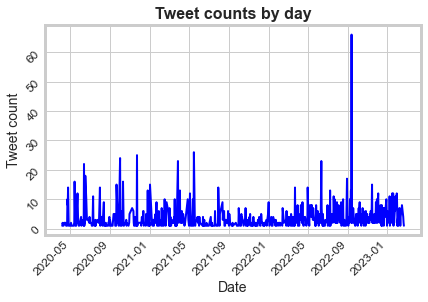

In [61]:
#plot linechat of tweets by day
#sns.lineplot(err_style="band",data = dt);

# plot a line chart of the tweet counts by day with customized style
sns.set_style("whitegrid")  # set the plot style
sns.set_palette("Set1")     # set the color palette

ax = sns.lineplot(data=dt, linewidth=2, color='b')  # set line width and color

# set the plot title and axis labels
ax.set_title('Tweet counts by day', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Tweet count', fontsize=14)

# set the tick label size and rotation
ax.tick_params(labelsize=12, rotation=45)

# adjust the x-axis label spacing
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.15)

# display the plot
plt.show()

In [62]:
# Function for polarity score
def polarity(Tweets):
    return TextBlob(Tweets).sentiment.polarity

def subjectivity(Tweets):
    return TextBlob(Tweets).sentiment.subjectivity

# Function to get sentiment type
#setting the conditions
def segmentation(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [63]:
# using the functions to get the polarity and sentiment
df['Polarity'] = df['Cleaned_Texts'].apply(polarity)
df['Subjectivity'] = df['Cleaned_Texts'].apply(subjectivity)
df['Sentiment'] = df['Polarity'].apply(segmentation)
sent = df['Sentiment'].value_counts()
sent

Positive    1334
Neutral      846
Negative     321
Name: Sentiment, dtype: int64

In [64]:
df.head()

,TweetId,Username,Text,HashTag,TotalLikes,TotalReplies,Followers,Friends,MentionedUsers,inReplyToUser,...,ViewCount,RetweetCount,SourceLabel,URL,Cleaned_Texts,date,time,Polarity,Subjectivity,Sentiment
0,1628085124435783690,atiku,"Earlier today, I was pleased to receive a dele...",NaN,793,309,4819950,161,"[User(username='UNDP', id=20596281, displaynam...",NaN,...,29714.0,200,Twitter for iPhone,https://twitter.com/atiku/status/1628085124435...,earlier today pleased receive delegation led a...,2023-02-21,17:31:56,0.2000,0.625,Positive
1,1627727167948787734,atiku,I just finished a meeting with the Commonwealt...,NaN,3285,1399,4819950,161,NaN,NaN,...,161893.0,557,Twitter for iPhone,https://twitter.com/atiku/status/1627727167948...,finished meeting commonwealth observer group n...,2023-02-20,17:49:33,0.5375,0.675,Positive
2,1627581098250084353,atiku,"Last night, I met with Rivers State Stakeholde...",NaN,4862,1151,4819950,161,NaN,NaN,...,415474.0,837,Twitter for iPhone,https://twitter.com/atiku/status/1627581098250...,night met river state stakeholder abuja discus...,2023-02-20,08:09:07,0.1250,0.250,Positive
3,1627270976302972930,atiku,"On behalf of my team, I wholeheartedly thank e...",['RecoverNigeria'],342,20,4819950,161,NaN,https://twitter.com/atiku,...,24122.0,96,Twitter for iPhone,https://twitter.com/atiku/status/1627270976302...,behalf team wholeheartedly thank nigerian took...,2023-02-19,11:36:48,0.0000,0.000,Neutral
4,1627270972699996161,atiku,I believe that when we all play our parts as s...,NaN,336,26,4819950,161,"[User(username='OfficialPDPNig', id=7470641311...",https://twitter.com/atiku,...,26451.0,101,Twitter for iPhone,https://twitter.com/atiku/status/1627270972699...,believe play part stakeholder election weekend...,2023-02-19,11:36:47,0.8000,0.750,Positive


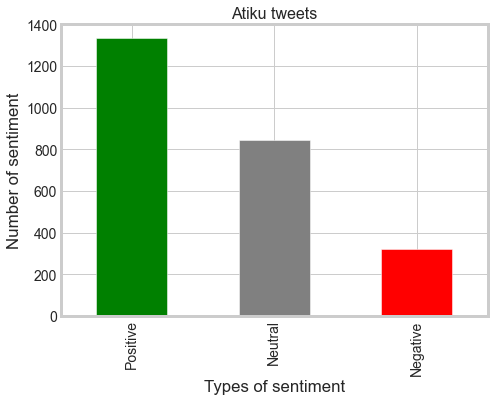

In [65]:
# plotting bar chart for the Sentiment
plt.subplot(1,2,1)
sent.plot(kind='bar', color=['green','grey','red'], figsize=(15,5))
plt.title('Atiku tweets', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment');

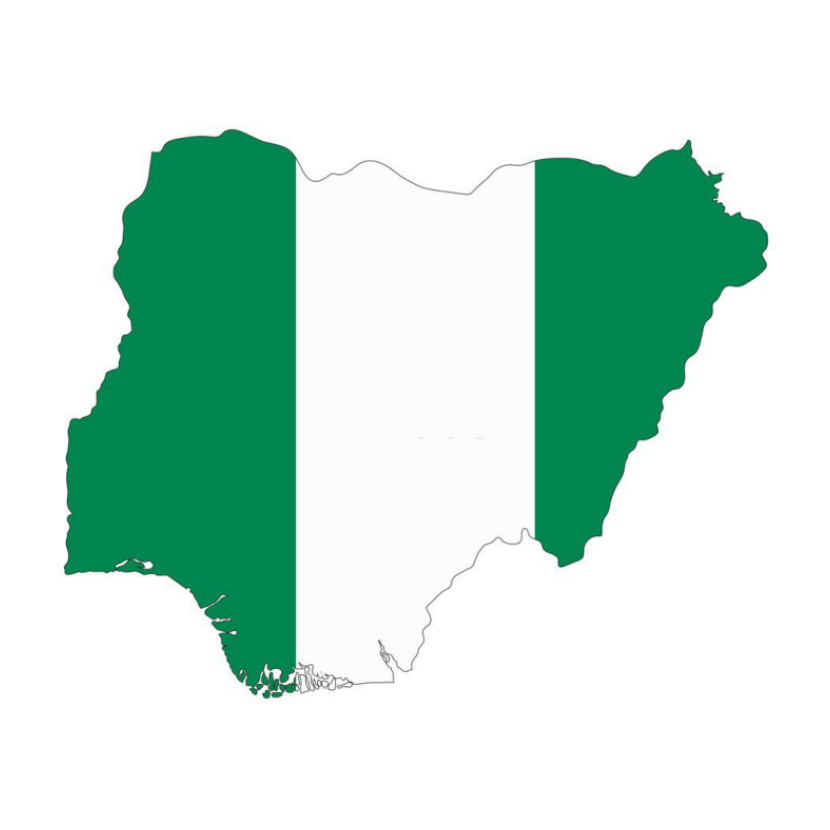

In [66]:
image = np.array(Image.open('NaijaFlag.png'))    
plt.figure(figsize=(18, 14)) 
plt.imshow(image) 
plt.axis('off')
plt.show()

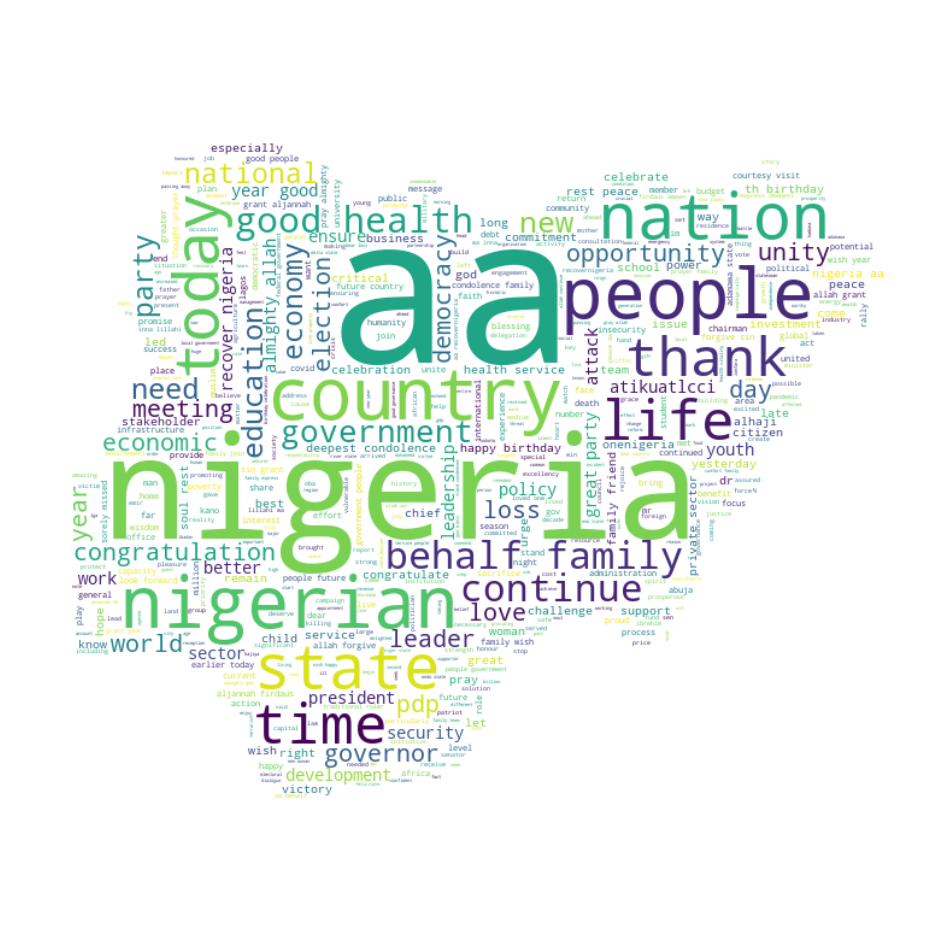

In [67]:
#Join all the tweets
full_tweet = " ".join(df["Cleaned_Texts"])

# Instantiate The Word Cloud and Set it to contain maximum of 1000 words
atiku_wc = WordCloud(background_color='white', max_words=1000, mask=image)

# generate the word cloud
atiku_wc.generate(full_tweet)


# display the word cloud
plt.figure(figsize=(18, 16))
plt.imshow(atiku_wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [68]:
atiku_wc.to_file("Atiku_WordCloud.png")

In [69]:
df.to_csv('Atiku_final_tweets.csv')
#saving the processed data